In [1]:
url="https://raw.githubusercontent.com/darshML/ML-Projects/main/Datasets/diabetes.csv"

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**The different columns present in the dataset**

In [87]:
dia=pd.read_csv(url)

In [4]:
print("Number of rows present in the dataset are: ", dia.shape)

Number of rows present in the dataset are:  (768, 9)


In [66]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

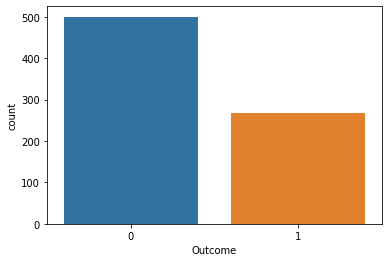

In [7]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(dia['Outcome'])
plt.show()

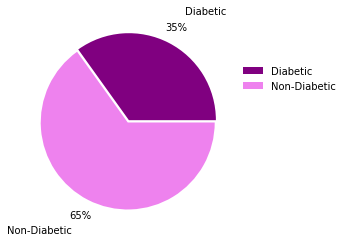

In [9]:
fig, ax = plt.subplots()

labels = ['Diabetic', 'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.03,0)
color_set = ('purple','violet')
ax.pie(percentages, explode=explode, labels=labels,colors=color_set, autopct='%1.0f%%', shadow=False, startangle=0, pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

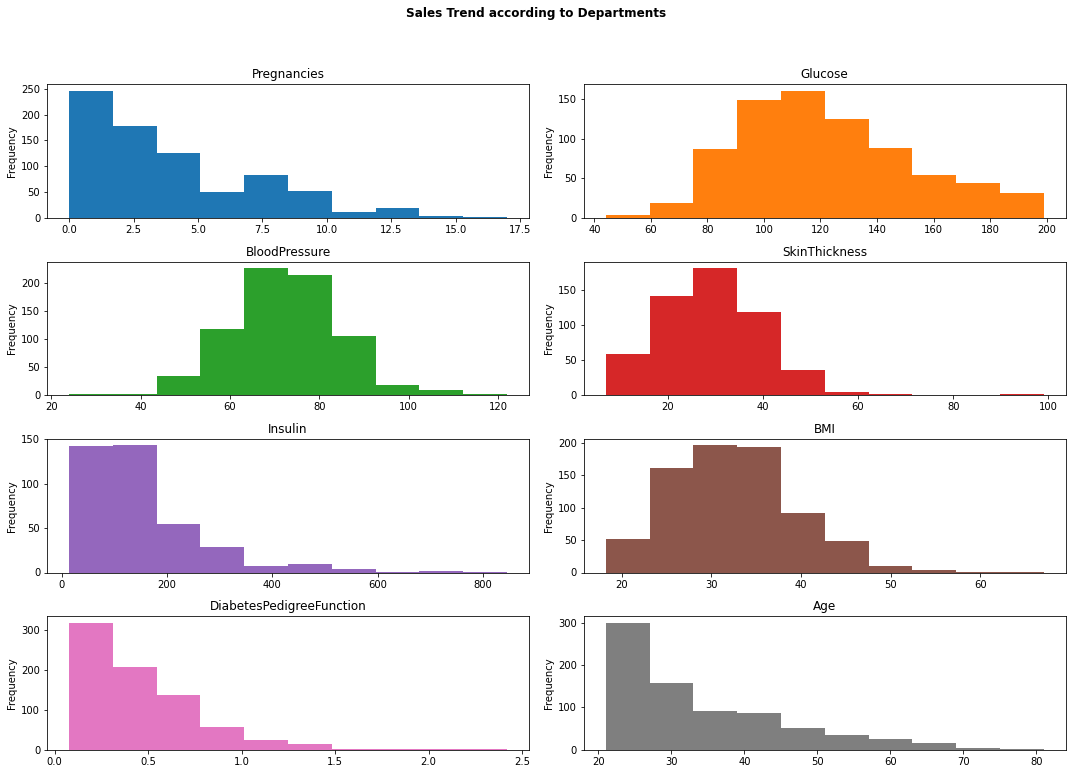

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = dia.drop('Outcome', axis = 1).columns
for col in columns:
    dia[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('FREQUENCIESs',y=1.07,weight='bold')
plt.tight_layout()
plt.show()

# **MODELLING**

In [68]:
from sklearn.model_selection import train_test_split
x = dia.drop(['Outcome'],axis=1)
y = dia['Outcome']

In [69]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(x)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [73]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [74]:
x_test.shape, y_test.shape

((231, 8), (231,))

In [84]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 1, min_samples_split = 10,   n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
print("Accuracy: {}%".format((100*acc)))

Accuracy: 76.62337662337663%


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       157
           1       0.67      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [86]:
from sklearn import metrics
confmat1 = confusion_matrix(y_pred, y_test)
confmat1

array([[137,  34],
       [ 20,  40]])

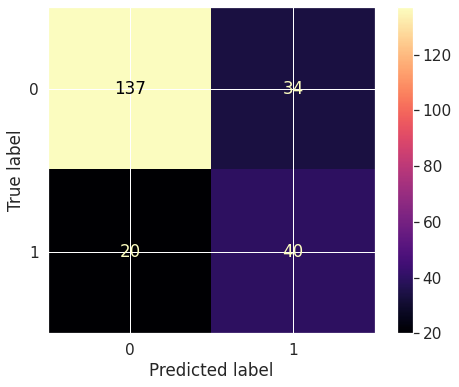

In [80]:
from sklearn import metrics
sns.set(rc={'figure.figsize':(8,6)})
sns.set(font_scale=1.4)
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_forest.classes_),
                              display_labels=random_forest.classes_)
cm.plot(cmap="magma")